Cechy (features) w zbiorze danych Boston Housing opisują różne parametry dotyczące nieruchomości w obszarze Bostonu. Oto krótki opis każdej z tych cech:

1. **CRIM**: Złoczyńczość na mieszkańca (Crime Rate per Capita) - Określa liczbę przestępstw na mieszkańca w danym obszarze. Jest to wskaźnik przestępczości w danym regionie.

2. **ZN**: Procent działek przeznaczonych pod zabudowę mieszkaniową (Proportion of Residential Land zoned for large lots) - Określa procent obszarów przeznaczonych pod duże działki przeznaczone pod zabudowę mieszkaniową.

3. **INDUS**: Procent obszarów przemysłowych (Proportion of Non-Retail Business Acres) - Określa procent obszarów przeznaczonych pod działalność gospodarczą, które nie są związane z handlem detalicznym.

4. **CHAS**: Bliskość do rzeki Charles (Charles River Dummy Variable) - Cecha binarna, która przyjmuje wartość 1, jeśli nieruchomość jest położona blisko rzeki Charles, a 0 w przeciwnym przypadku.

5. **NOX**: Stężenie tlenku azotu (Nitrogen Oxides Concentration) - Określa stężenie tlenku azotu w powietrzu, co jest miarą jakości powietrza w danym obszarze.

6. **RM**: Średnia liczba pokoi na mieszkanie (Average Number of Rooms per Dwelling) - Określa średnią liczbę pokoi w mieszkaniu lub domu.

7. **AGE**: Procent budynków zbudowanych przed 1940 rokiem (Proportion of Owner-Occupied Units Built Prior to 1940) - Określa procent budynków, które zostały zbudowane przed 1940 rokiem.

8. **DIS**: Wagi ważone odległości do pięciu centrów zatrudnienia w Bostonie (Weighted Distances to Employment Centers) - Opisuje odległość od nieruchomości do pięciu centrów zatrudnienia w Bostonie.

9. **RAD**: Prostota dostępu do głównych dróg radialnych (Accessibility to Radial Highways) - Określa prostotę dostępu do głównych dróg radialnych.

10. **TAX**: Stawka podatku od nieruchomości (Property Tax Rate) - Określa stawkę podatku od nieruchomości w danym regionie.

11. **PTRATIO**: Stosunek liczby uczniów do nauczycieli (Pupil-Teacher Ratio) - Opisuje stosunek liczby uczniów do nauczycieli w miejscowej szkole podstawowej.

12. **B**: Procent mieszkańców pochodzenia afroamerykańskiego (Proportion of Residents of African American Descent) - Określa procent mieszkańców w danej dzielnicy pochodzenia afroamerykańskiego.

13. **LSTAT**: Procent ludności o niższym statusie społecznym (Lower Status Population Percentage) - Określa procent ludności o niższym statusie społecznym w danej dzielnicy.

14. **MEDV**: Mediana cen mieszkań (Median Value of Owner-Occupied Homes) - Jest to zmienna celu w zadaniu regresji, która określa medianę cen mieszkań w danej okolicy. Jest to zazwyczaj ta wartość, którą model ma na celu przewidzieć.

Te cechy są używane w zbiorze danych Boston Housing do przewidywania cen nieruchomości w Bostonie.

In [1]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Zadanie Boston Housing:

   1. Wybierz nieruchomości, których wiek (AGE) przekracza 95 lat.
   2. Wybierz nieruchomości, które znajdują się blisko rzeki Charles (CHAS = 1).
   3. Wybierz nieruchomości, których cena (MEDV) wynosi mniej niż 20 000 dolarów.
   4. Pogrupuj nieruchomości na podstawie liczby pokoi na mieszkanie (RM) i oblicz średnią cenę (MEDV) dla każdej grupy.
   5. Pogrupuj nieruchomości na podstawie ilości pokoi na mieszkanie (RM) i wieku (AGE), a następnie oblicz średnią stawkę podatku od nieruchomości (TAX) dla każdej kombinacji.
   6. Oblicz maksymalną i minimalną cenę nieruchomości (MEDV) w zbiorze danych.
   7. Oblicz średnią stawkę podatku od nieruchomości (TAX) w całym zbiorze danych.
   8. Wybierz nieruchomości, które mają wiek (AGE) poniżej 30 lat i jednocześnie znajdują się blisko rzeki Charles (CHAS = 1).


Wybierz nieruchomości, których wiek (AGE) przekracza 95 lat.

In [2]:
properties_over_95_years = df.loc[df['AGE'] > 95]
properties_over_95_years

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1


Wybierz nieruchomości, które znajdują się blisko rzeki Charles (CHAS = 1).

In [10]:
properties_near_charles_river = df.loc[df['CHAS'] == 1.0]
properties_near_charles_river

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.8710,6.152,NaN,1.7455,5,403,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
210,0.17446,NaN,10.59,1.0,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
211,0.37578,0.0,10.59,1.0,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3


Wybierz nieruchomości, których cena (MEDV) wynosi mniej niż 20 000 dolarów.

In [11]:
properties_under_20k = df.loc[df['MEDV'] < 20.0]
properties_under_20k

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8


Pogrupuj nieruchomości na podstawie liczby pokoi na mieszkanie (RM) i oblicz średnią cenę (MEDV) dla każdej grupy.

In [14]:
rooms_per_unit = df.groupby('RM')['MEDV'].mean().reset_index(name='Average_MEDV')
rooms_per_unit

,RM,Average_MEDV
0,3.561,27.50
1,3.863,23.10
2,4.138,12.85
3,4.368,8.80
4,4.519,7.00
...,...,...
441,8.375,50.00
442,8.398,48.80
443,8.704,50.00
444,8.725,50.00


Pogrupuj nieruchomości na podstawie ilości pokoi na mieszkanie (RM) i wieku (AGE), a następnie oblicz średnią stawkę podatku od nieruchomości (TAX) dla każdej kombinacji.

In [15]:
rooms_per_unit_and_age = df.groupby(['RM', 'AGE'])['TAX'].mean().reset_index(name='Average_TAX')
rooms_per_unit_and_age

,RM,AGE,Average_TAX
0,3.561,87.9,666.0
1,3.863,100.0,666.0
2,4.138,100.0,666.0
3,4.368,91.2,666.0
4,4.519,100.0,666.0
...,...,...,...
480,8.337,73.3,307.0
481,8.398,91.5,264.0
482,8.704,86.9,264.0
483,8.725,83.0,307.0


Oblicz maksymalną i minimalną cenę nieruchomości (MEDV) w zbiorze danych.

In [16]:
min_value = df['MEDV'].min()
min_value

5.0

In [17]:
max_value = df['MEDV'].max()
max_value

50.0

Oblicz średnią stawkę podatku od nieruchomości (TAX) w całym zbiorze danych.

In [18]:
average_tax = df['TAX'].mean()
average_tax

408.2371541501976

Wybierz nieruchomości, które mają wiek (AGE) poniżej 30 lat i jednocześnie znajdują się blisko rzeki Charles (CHAS = 1).

In [21]:
properties_under_30_years_and_near_charles_river = df.loc[
    (df['AGE'] < 30) &
    (df['CHAS'] == 1.0)
]
properties_under_30_years_and_near_charles_river

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
277,0.06127,40.0,6.41,1.0,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,NaN,33.1
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0


### Zadanie flights

Dane "flights" zawierają informacje o liczbie pasażerów, którzy podróżowali samolotem w poszczególnych miesiącach i latach. Twoim zadaniem jest przygotowanie raportu używając Pandas, który odpowie na następujące pytania:

* W którym roku i miesiącu zanotowano największą liczbę pasażerów?

* Które miesiące i lata mają tendencję do wyższej niż średnia liczby pasażerów?

* Czy istnieją okresy, w których liczba pasażerów jest wyraźnie niższa niż przeciętna?

* Jakie są różnice w liczbie pasażerów między różnymi latami? wskazówka: metoda .diff()

In [22]:
import pandas as pd

df = pd.read_csv('/kaggle/input/seaborn-practice/flights.csv')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    int64 
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [26]:
df.shape

(144, 3)

W którym roku i miesiącu zanotowano największą liczbę pasażerów?

In [27]:
max_passengers_row = df.loc[df['passengers'].idxmax()]
max_passengers_row

year          1960
month         July
passengers     622
Name: 138, dtype: object

Które miesiące i lata mają tendencję do wyższej niż średnia liczby pasażerów?

In [33]:
average_passengers = round(df['passengers'].mean())
average_passengers

280

In [40]:
high_than_average_months_and_years = df.loc[df['passengers'] > average_passengers].sort_values(by='year', ascending=True)
high_than_average_months_and_years

,year,month,passengers
66,1954,July,302
67,1954,August,293
77,1955,June,315
78,1955,July,364
79,1955,August,347
...,...,...,...
133,1960,February,391
132,1960,January,417
142,1960,November,390
136,1960,May,472


Czy istnieją okresy, w których liczba pasażerów jest wyraźnie niższa niż przeciętna?

In [42]:
lower_than_average_months_and_years = df.loc[df['passengers'] < average_passengers].sort_values(by='year', ascending=True)
lower_than_average_months_and_years

,year,month,passengers
0,1949,January,112
11,1949,December,118
10,1949,November,104
9,1949,October,119
7,1949,August,148
...,...,...,...
81,1955,October,274
82,1955,November,237
83,1955,December,278
85,1956,February,277


Jakie są różnice w liczbie pasażerów między różnymi latami? wskazówka: metoda .diff()

In [47]:
annual_passengers = df.groupby('year')['passengers'].sum().reset_index()
annual_passengers['passenger_diff'] = annual_passengers['passengers'].diff()
annual_passengers

,year,passengers,passenger_diff
0,1949,1520,NaN
1,1950,1676,156.0
2,1951,2042,366.0
3,1952,2364,322.0
4,1953,2700,336.0
5,1954,2867,167.0
6,1955,3408,541.0
7,1956,3939,531.0
8,1957,4421,482.0
9,1958,4572,151.0


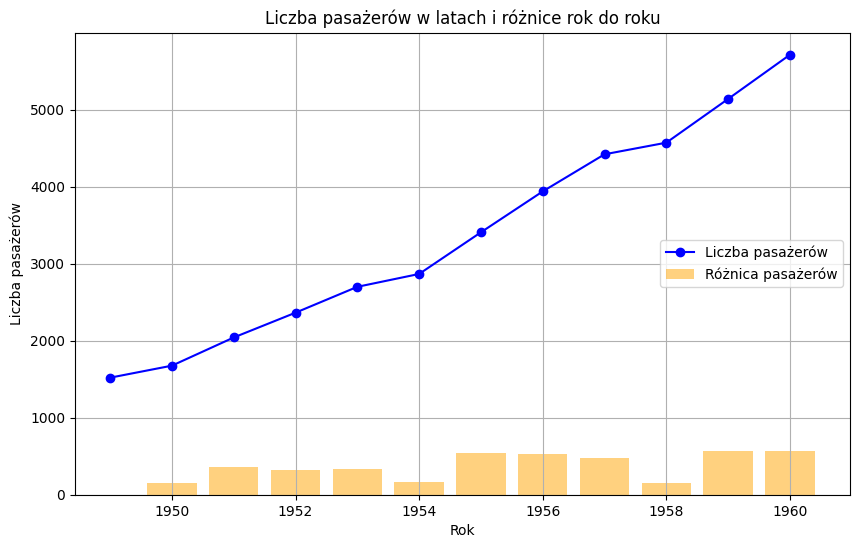

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(annual_passengers['year'], annual_passengers['passengers'], marker='o', linestyle='-', color='b', label='Liczba pasażerów')
plt.bar(annual_passengers['year'], annual_passengers['passenger_diff'], color='orange', alpha=0.5, label='Różnica pasażerów')

plt.title('Liczba pasażerów w latach i różnice rok do roku')
plt.xlabel('Rok')
plt.ylabel('Liczba pasażerów')
plt.legend()
plt.grid(True)

plt.show()

### Zadanie penguins

Zbiór danych "penguins" z biblioteki seaborn zawiera informacje dotyczące pingwinów. Ten zbiór danych zawiera pomiary różnych cech fizycznych pingwinów, takich jak gatunek, płeć, długość skrzydła, długość dzioba, masa ciała itp.

Struktura zbioru danych "penguins":

* Kolumna "species" zawiera informacje o gatunku pingwina, przyjmując jedną z trzech wartości: "Adelie", "Chinstrap" lub "Gentoo".
* Kolumna "island" zawiera informacje o wyspie, na której mieszkają pingwiny, przyjmując jedną z trzech wartości: "Biscoe", "Dream" lub "Torgersen".
* Kolumna "bill_length_mm" zawiera pomiary długości dzioba w milimetrach.
* Kolumna "bill_depth_mm" zawiera pomiary głębokości dzioba w milimetrach.
* Kolumna "flipper_length_mm" zawiera pomiary długości skrzydła (płetwy) w milimetrach.
* Kolumna "body_mass_g" zawiera pomiary masy ciała pingwina w gramach.
* Kolumna "sex" zawiera informacje o płci pingwina, przyjmując jedną z dwóch wartości: "male" lub "female".

Analiza danych dotyczących pingwinów

Zbiór danych "penguins" z biblioteki seaborn zawiera informacje o różnych cechach pingwinów, takich jak gatunek, płeć, długość skrzydła, długość dzioba itp. Twoim zadaniem jest przygotowanie raportu, który odpowie na następujące pytania:



1. Która z trzech gatunków pingwinów jest najliczniejsza w zbiorze danych?

2. Jakie są średnie wartości poszczególnych cech dla każdego gatunku pingwina?

3. Oblicz średnią masę ciała pingwinów dla każdego gatunku osobno.

4. Porównaj rozkład długości skrzydeł pingwinów na poszczególnych wyspach.

5. Znajdź najmniejszą i największą wartość długości dzioba dla każdej płci.

6. Oblicz sumę mas ciała pingwinów dla każdej kombinacji gatunku i płci.

7. Zgrupuj pingwiny na podstawie gatunku i wyspy, a następnie oblicz medianę masy ciała dla każdej grupy.

8. Znajdź najliczniejszą kombinację gatunku, wyspy i płci w zbiorze danych "penguins".

In [49]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/seaborn-practice/penguins.csv')

In [91]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [50]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [51]:
df.shape

(344, 7)

Która z trzech gatunków pingwinów jest najliczniejsza w zbiorze danych?

In [56]:
most_abundant_penguin_species = species_counts = df['species'].value_counts()
most_abundant_penguin_species

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Jakie są średnie wartości poszczególnych cech dla każdego gatunku pingwina?

In [58]:
average_features = df.groupby('species').mean(numeric_only=True)
average_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


Oblicz średnią masę ciała pingwinów dla każdego gatunku osobno.

In [65]:
average_body_mass = round(df.groupby('species')['body_mass_g'].mean().reset_index(name='Average_Body_Mass'))
average_body_mass

,species,Average_Body_Mass
0,Adelie,3701.0
1,Chinstrap,3733.0
2,Gentoo,5076.0


Porównaj rozkład długości skrzydeł pingwinów na poszczególnych wyspach.

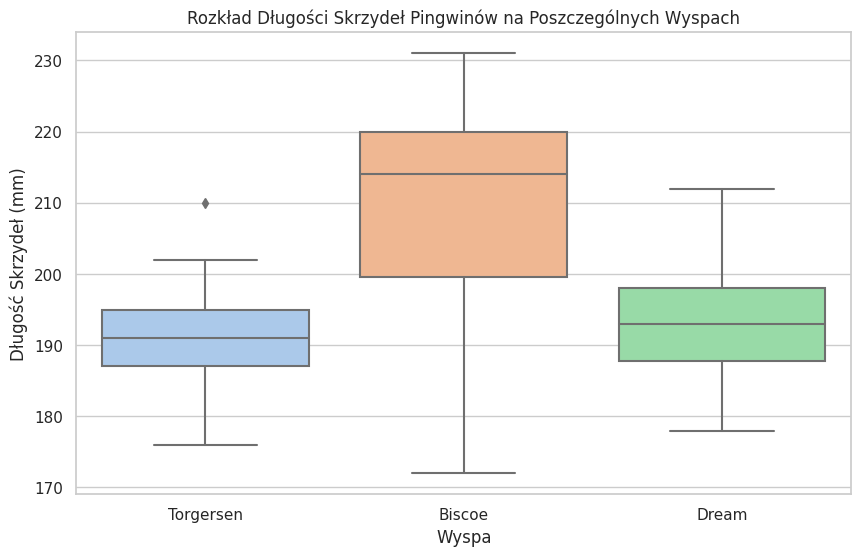

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='island', y='flipper_length_mm', data=df, palette='pastel')

plt.title('Rozkład długości skrzydeł pingwinów na poszczególnych wyspach')
plt.xlabel('Wyspa')
plt.ylabel('Długość Skrzydeł (mm)')

plt.show()

Znajdź najmniejszą i największą wartość długości dzioba dla każdej płci.

In [67]:
bill_length_stats = df.groupby('sex')['bill_length_mm'].agg(['min', 'max']).reset_index()
bill_length_stats

,sex,min,max
0,FEMALE,32.1,58.0
1,MALE,34.6,59.6


Oblicz sumę mas ciała pingwinów dla każdej kombinacji gatunku i płci.

In [68]:
body_mass_sum = df.groupby(['species', 'sex'])['body_mass_g'].sum().reset_index()
body_mass_sum

,species,sex,body_mass_g
0,Adelie,FEMALE,245925.0
1,Adelie,MALE,295175.0
2,Chinstrap,FEMALE,119925.0
3,Chinstrap,MALE,133925.0
4,Gentoo,FEMALE,271425.0
5,Gentoo,MALE,334575.0


Zgrupuj pingwiny na podstawie gatunku i wyspy, a następnie oblicz medianę masy ciała dla każdej grupy.

In [69]:
median_body_mass_by_species_island = df.groupby(['species', 'island'])['body_mass_g'].median().reset_index()
median_body_mass_by_species_island

,species,island,body_mass_g
0,Adelie,Biscoe,3750.0
1,Adelie,Dream,3575.0
2,Adelie,Torgersen,3700.0
3,Chinstrap,Dream,3700.0
4,Gentoo,Biscoe,5000.0


Znajdź najliczniejszą kombinację gatunku, wyspy i płci w zbiorze danych "penguins".

In [71]:
grouped_counts = df.groupby(['species', 'island', 'sex']).size().reset_index(name='count')
most_populous_species_island_sex_combination = grouped_counts.loc[grouped_counts['count'].idxmax()]
most_populous_species_island_sex_combination

species    Gentoo
island     Biscoe
sex          MALE
count          61
Name: 9, dtype: object



#### Zadanie Tips:
Twoim zadaniem jest wykonanie analizy danych dotyczących napiwków przy użyciu pivotingu w bibliotece pandas. Dane pochodzą z zestawu danych tips, który zawiera informacje o rachunkach z napiwkami w fikcyjnej restauracji.

Wymagania:

1. Wczytaj zestaw danych tips do ramki danych pandas.
2. Przeprowadź podstawową eksplorację danych, taką jak wyświetlenie początkowych wierszy, podsumowanie statystyk, sprawdzenie brakujących danych itp.
3. Wykorzystaj funkcję pivota w pandasie, aby analizować dane z różnych perspektyw.
Wykonaj następujące analizy przy użyciu pivota:
*  Oblicz średnią wartość napiwków dla różnych dni tygodnia.
*  Porównaj średnią wartość napiwków między palaczy a niepalaczy.
*  Grupuj dane według rodzaju posiłku (lunch, dinner) i sprawdź średnią wartość napiwków dla każdego rodzaju posiłku.
*  Porównaj średnią wartość napiwków dla różnych grup rozmiarów (liczba osób) w grupach.
Przedstaw wyniki analizy w formie tabel.

Dokonaj oceny i interpretacji wyników, wskazując na potencjalne wzorce, zależności lub wnioski wynikające z analizy.
Wskazówki:

Przed rozpoczęciem analizy zaleca się wykonanie odpowiednich czynności wstępnej obróbki danych, takich jak usuwanie niepotrzebnych kolumn, konwersja typów danych itp.
Wykorzystaj funkcje agregujące w pivocie, takie jak mean, sum, count itp., aby obliczać różne statystyki dla analizowanych wartości.
Korzystaj z możliwości filtrowania i sortowania danych w pandasie w celu bardziej szczegółowej analizy.


In [72]:
import pandas as pd 

df = pd.read_csv('/kaggle/input/seaborn-practice/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Oblicz średnią wartość napiwków dla różnych dni tygodnia.

In [77]:
average_tip_per_day = df.groupby('day')['tip'].mean()
average_tip_per_day

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

Porównaj średnią wartość napiwków między palaczy a niepalaczy.

In [81]:
average_tip_smoke_or_no = df.groupby('smoker')['tip'].mean()
average_tip_smoke_or_no

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

Grupuj dane według rodzaju posiłku (lunch, dinner) i sprawdź średnią wartość napiwków dla każdego rodzaju posiłku.

In [82]:
average_tip_by_meal_type = df.groupby('time')['tip'].mean()
average_tip_by_meal_type

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

Porównaj średnią wartość napiwków dla różnych grup rozmiarów (liczba osób) w grupach. Przedstaw wyniki analizy w formie tabel.

In [88]:
average_tips_by_size = df.groupby('size')['tip'].mean().reset_index()
average_tips_by_size.columns = ['Rozmiar grupy', 'Średnia wartość napiwków']
average_tips_by_size

,Rozmiar grupy,Średnia wartość napiwków
0,1,1.437500
1,2,2.582308
2,3,3.393158
3,4,4.135405
4,5,4.028000
5,6,5.225000


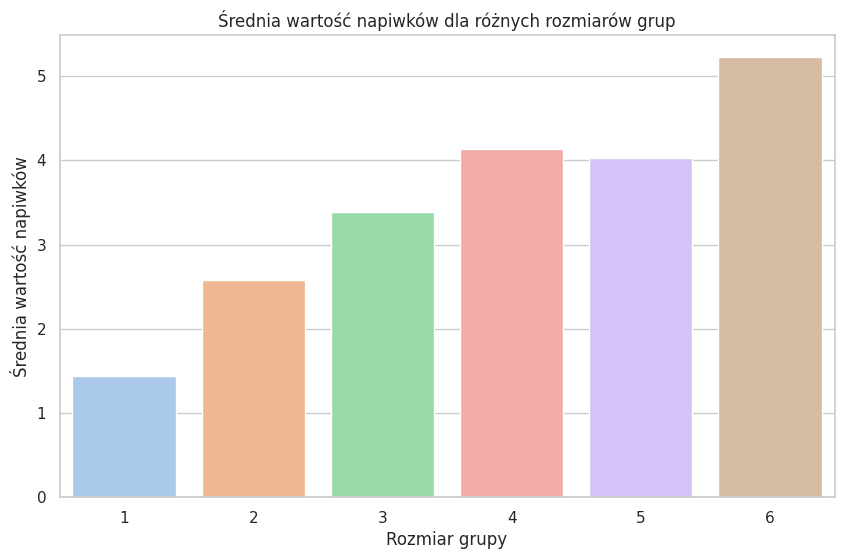

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Rozmiar grupy', y='Średnia wartość napiwków', data=average_tips_by_size, palette='pastel')

plt.title('Średnia wartość napiwków dla różnych rozmiarów grup')
plt.xlabel('Rozmiar grupy')
plt.ylabel('Średnia wartość napiwków')
plt.show()

 Obliczanie średnich napiwków dla każdego dnia i rozmiaru grupy

In [93]:
pivot_mean_tips = df.pivot_table(values='tip', index='day', columns='size', aggfunc='mean')
pivot_mean_tips

size,1,2,3,4,5,6
day,,,,,,
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3


Obliczanie średniej wartości rachunku dla każdej kombinacji dnia i płci

In [95]:
pivot_sum_bill = df.pivot_table(values='total_bill', index='day', columns='sex', aggfunc='mean')
pivot_sum_bill

sex,Female,Male
day,,
Fri,14.145556,19.857000
Sat,19.680357,20.802542
Sun,19.872222,21.887241
Thur,16.715312,18.714667


Liczenie liczby transakcji dla każdej kombinacji dnia i rozmiaru grupy

In [96]:
pivot_count_transactions = df.pivot_table(values='total_bill', index='day', columns='size', aggfunc='count')
pivot_count_transactions

size,1,2,3,4,5,6
day,,,,,,
Fri,1.0,16.0,1.0,1.0,NaN,NaN
Sat,2.0,53.0,18.0,13.0,1.0,NaN
Sun,NaN,39.0,15.0,18.0,3.0,1.0
Thur,1.0,48.0,4.0,5.0,1.0,3.0
